In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

names =["1","2","3","4","5","6","7"]
data_df = pd.read_csv('yachtData.csv',names=names)

data_df 


,1,2,3,4,5,6,7
0,-2.3,0.568,4.78,3.99,3.17,0.125,0.11
1,-2.3,0.568,4.78,3.99,3.17,0.150,0.27
2,-2.3,0.568,4.78,3.99,3.17,0.175,0.47
3,-2.3,0.568,4.78,3.99,3.17,0.200,0.78
4,-2.3,0.568,4.78,3.99,3.17,0.225,1.18
...,...,...,...,...,...,...,...
303,-2.3,0.600,4.34,4.23,2.73,0.350,8.47
304,-2.3,0.600,4.34,4.23,2.73,0.375,12.27
305,-2.3,0.600,4.34,4.23,2.73,0.400,19.59
306,-2.3,0.600,4.34,4.23,2.73,0.425,30.48


In [2]:
X = data_df.iloc[:, :-1]
y = data_df.iloc[:, -1]

In [3]:
import sklearn 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [4]:
print(X_train)
print(y_train)

       1      2     3     4     5      6
159  0.0  0.565  5.10  3.94  3.51  0.250
111 -2.4  0.585  4.78  3.84  3.32  0.450
62  -2.4  0.574  4.36  3.96  2.76  0.275
242 -5.0  0.600  4.78  4.24  3.15  0.225
131  0.0  0.565  4.77  3.99  3.15  0.250
..   ...    ...   ...   ...   ...    ...
203 -2.3  0.530  4.76  3.68  3.16  0.300
255  0.0  0.530  4.78  3.75  3.15  0.200
72  -2.4  0.568  4.34  2.98  3.15  0.175
235  0.0  0.600  4.78  4.24  3.15  0.400
37  -2.3  0.565  4.78  5.35  2.76  0.350

[246 rows x 6 columns]
159     1.90
111    44.38
62      2.83
242     1.13
131     1.96
       ...  
203     3.09
255     0.92
72      0.43
235    23.15
37      8.25
Name: 7, Length: 246, dtype: float64


In [5]:
# Create parameters from training sets

parametersX = []

for i in range(len(X_train.columns)):
    Cseries = X_train.iloc[:, i]
    mean = np.mean(Cseries)
    std = np.std(Cseries)
    parametersX.append([mean,std])
    
parametersY = [np.mean(y_train), np.std(y_train)]

In [6]:
# Normalize the training sets

X_train_norm = pd.DataFrame([[(X_train.iloc[i, j] - parametersX[j][0])/parametersX[j][1] 
                             for j in range(len(X_train.columns))] 
                            for i in range(len(X_train.iloc[:]))])

X_test_norm = pd.DataFrame([[(X_test.iloc[i, j] - parametersX[j][0])/parametersX[j][1] 
                             for j in range(len(X_test.columns))] 
                            for i in range(len(X_test.iloc[:]))])

# No need to normalize the test sets

y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

In [7]:
#X_train_norm.head(10)
y_train.head(10)
#y_test.head(10)

,7
159,1.90
111,44.38
62,2.83
242,1.13
131,1.96
161,3.76
146,2.77
88,1.57
172,1.19
125,53.07


In [9]:
#Calculate the loss function

def costFunc(X,y,theta):
    m = X.shape[0]
    costs = X.dot(theta) - y
    total_cost = costs.transpose().dot(costs) / (2 * m)
    return total_cost[0][0]


In [10]:
def return_Y_estimate(theta_now, data_x):
     # make sure thata is a column vector
    theta_now = theta_now.reshape(-1, 1)
    _Y_estimate = np.dot(data_x, theta_now)

    return _Y_estimate

def return_dJ(theta_now, data_x, y_true):
    y_estimate = return_Y_estimate(theta_now, data_x)
    _N = data_x.shape[0]
    _num_of_features = data_x.shape[1]
    _dJ = np.zeros([_num_of_features, 1])
    
    for i in range(_num_of_features):
        _dJ[i, 0] = 2 * np.dot((y_estimate - y_true).T, data_x[:, i]) / _N
    
    return _dJ

# Calculate EMSE
def RMSE(theta_now, data_x, y_true):
    N = data_x.shape[0]
    temp = y_true - np.dot(data_x, theta_now)
    _J = np.sqrt(np.dot(temp.T, temp) / N)
    
    return _J

def gradient_descent(X, y, Learning_rate, ER, iterNum):
    _num_of_samples = X.shape[0]
    
    X_0 = np.ones([_num_of_samples, 1])
    new_x = np.column_stack((X_0, X))
    
    new_y = y.values.reshape(-1, 1)
  
    _num_of_features = new_x.shape[1]
    
    theta = np.zeros([_num_of_features, 1])
    flag = 0 
    ct = 0  
    J_history = list()
    
    while flag == 0 and ct < iterNum:
        last_theta = theta
        gradient =  return_dJ(theta, new_x, new_y)
        theta = theta - Learning_rate * gradient
        er = RMSE(last_theta, new_x, new_y) - RMSE(theta, new_x, new_y)
        J_history.append(costFunc(new_x, new_y, theta))
        if er < ER :
            flag = 1
        
        ct += 1
        
            
    return theta,J_history, ct

In [11]:
Learning_rate = 0.1*1e-2
ER = 0.1*1e-2
iterNum = 50000

In [12]:
theta, J_history, ct = gradient_descent(X_train_norm, y_train, Learning_rate, ER, iterNum)
print(theta)
print(J_history)
ct

[[ 8.92402969]
 [ 0.06065166]
 [-0.67740484]
 [ 0.09296468]
 [ 0.03419229]
 [-0.20195878]
 [10.4215411 ]]
[164.12365823410258, 163.62316921230584, 163.12468219925188, 162.62818917483042, 162.13368215112234, 161.64115317226978, 161.15059431434727, 160.66199768523327, 160.175355424482, 159.69065970319616, 159.20790272389974, 158.72707672041196, 158.2481739577209, 157.7711867318583, 157.29610736977477, 156.82292822921502, 156.35164169859425, 155.88224019687462, 155.41471617344234, 154.94906210798536, 154.4852705103712, 154.02333392052589, 153.5632449083126, 153.1049960734115, 152.64858004519988, 152.1939894826322, 151.74121707412155, 151.290255537421, 150.84109761950543, 150.3937360964542, 149.9481637733339, 149.50437348408173, 149.06235809138943, 148.62211048658762, 148.18362358953047, 147.74689034848114, 147.31190373999726, 146.8786567688175, 146.44714246774768, 146.0173538975484, 145.58928414682217, 145.16292633190173, 144.7382735967383, 144.31531911279072, 143.8940560789145, 143.47447

1005

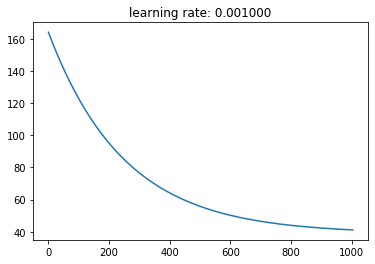

In [13]:
plt.figure()
plt.plot([i for i in range(len(J_history))], J_history)
plt.title("learning rate: %f" % Learning_rate)
plt.show()

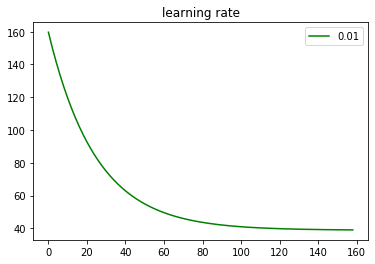

In [14]:
ta1, J_history1, ct1 = gradient_descent(X_train_norm, y_train, 0.01, 0.1*1e-2, 50000)
colors = ['b', 'g', 'r']
plt.figure()
plt.plot([i for i in range(len(J_history1))], J_history1, colors[1], label="0.01")
plt.title("learning rate")
plt.legend()
plt.show()


In [15]:
ta2, J_history2, ct2 = gradient_descent(X_train_norm, y_train, 0.05, 0.1*1e-2, 50000)

In [16]:
ta3, J_history3, ct3 = gradient_descent(X_train_norm, y_train, 0.1, 0.1*1e-2, 50000)
J_history3

[119.36114037792946,
 90.40154823019193,
 71.86763049039108,
 60.00259739420406,
 52.40484363095808,
 47.53844306683299,
 44.42075940823683,
 42.42294168050631,
 41.14243966691234,
 40.321503125329684,
 39.795058626902744,
 39.45736383873141,
 39.240668603634866,
 39.10155604388703,
 39.01219754075302,
 38.95475255602194,
 38.91778160841593,
 38.89394824894704,
 38.8785465421278,
 38.86855732898635,
 38.8620432711016]

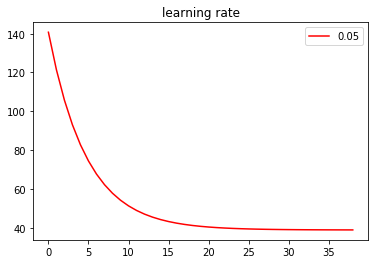

In [17]:
colors = ['b', 'g', 'r']
plt.figure()
plt.plot([i for i in range(len(J_history2))], J_history2, colors[2], label="0.05")
plt.title("learning rate")
plt.legend()
plt.show()

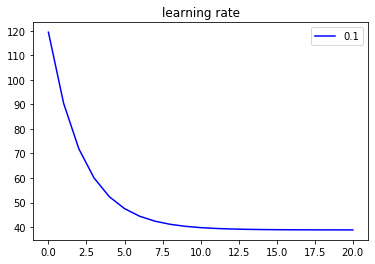

In [18]:
colors = ['b', 'g', 'r']
plt.figure()
plt.plot([i for i in range(len(J_history3))], J_history3, colors[0], label="0.1") 
plt.title("learning rate")
plt.legend()
plt.show()

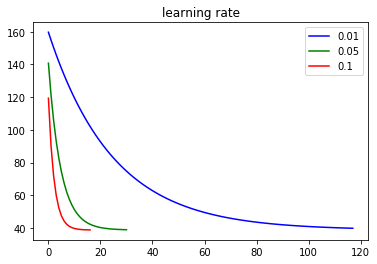

In [19]:
def learningRatePlot(X_norm, y):
    colors = ['b', 'g', 'r', 'c','m']
    plt.figure()
    
    for i, al in enumerate([0.01, 0.05, 0.1]):
        
        ta, J, ci = gradient_descent(X_norm, y, al, 0.5*1e-2, 50000)
 
        plt.plot([i for i in range(len(J))], J, colors[i], label=str(al))
 
    plt.title("learning rate")
    plt.legend()
    plt.show()
    
learningRatePlot(X_train_norm, y_train)

In [20]:
#prediction
X_1=np.ones([len(X_test_norm), 1])
X_pre_norm = np.column_stack((X_1, X_test_norm))
y_pre = X_pre_norm.dot(theta)
print(y_pre)
print(y_pre.shape)
print(y_test)

[[-0.33075717]
 [17.24041755]
 [ 1.65071344]
 [-8.88635244]
 [11.42375325]
 [17.98879695]
 [-4.19287594]
 [-0.93339152]
 [13.80721215]
 [-2.70815149]
 [ 8.72764884]
 [ 4.86762611]
 [22.3235531 ]
 [19.82452251]
 [-1.2035106 ]
 [-0.84831715]
 [13.53871914]
 [-0.09993775]
 [ 6.81892335]
 [ 1.99711873]
 [24.99273242]
 [20.5531507 ]
 [-5.46879372]
 [20.5729019 ]
 [11.11248499]
 [24.03300978]
 [-3.33626114]
 [ 5.41506353]
 [ 5.78640427]
 [-4.9213563 ]
 [23.13725565]
 [22.05343401]
 [25.25406334]
 [-0.12404653]
 [-4.78558569]
 [25.91404012]
 [14.75247356]
 [ 5.98970905]
 [-5.09521936]
 [19.06406867]
 [ 4.2348184 ]
 [ 3.40560409]
 [ 9.58426364]
 [24.23227858]
 [ 7.99916849]
 [14.57123823]
 [15.40469199]
 [ 1.83194877]
 [13.89585876]
 [ 2.464416  ]
 [25.74111182]
 [ 8.83964829]
 [15.3261199 ]
 [25.54046576]
 [17.75797753]
 [15.38494078]
 [ 6.6182773 ]
 [-3.17109119]
 [23.32993516]
 [-8.08307204]
 [-7.87200383]
 [15.20404594]]
(62, 1)
         7
73    0.69
304  12.27
228   1.30
238   0.06
259   

In [21]:
def RMSE_Regression (y_pre, y_test):
    N = y_pre.shape[0]
    temp = y_test - y_pre
    RMSE_GD = np.sqrt(np.dot(temp.T, temp) / N)
    print(RMSE_GD)

In [22]:
#Return the RMSE through Gradient Descent 
RMSE_GD = RMSE_Regression(y_pre, y_test)

[[9.59825165]]


In [23]:
#Normal equation
def normalEquation(X, y):
    return np.linalg.inv(X.transpose().dot(X)).dot(X.transpose()).dot(y)

In [24]:

theta_LSE = normalEquation(X_pre_norm, y_test)

In [25]:
x_pre = X_pre_norm
y_pre2 = x_pre.dot(theta_LSE)
print(y_pre2)

[[ 5.40477377e-01]
 [ 2.31975441e+01]
 [ 3.33374126e+00]
 [-1.10622460e+01]
 [ 1.02156778e+01]
 [ 2.23357285e+01]
 [-9.89819470e+00]
 [ 4.82811842e-02]
 [ 1.22469909e+01]
 [-5.14624204e+00]
 [ 6.52910568e+00]
 [ 4.65428110e+00]
 [ 2.96174219e+01]
 [ 2.64830042e+01]
 [ 1.92075648e-02]
 [ 1.99323595e-01]
 [ 1.44064867e+01]
 [-6.62492064e-01]
 [ 9.90466141e+00]
 [ 6.71479444e+00]
 [ 3.30539244e+01]
 [ 2.48258632e+01]
 [-8.48755920e+00]
 [ 2.56211885e+01]
 [ 1.35558361e+01]
 [ 2.99831364e+01]
 [-1.94466695e+00]
 [ 5.20303963e+00]
 [ 4.55010647e+00]
 [-7.93880068e+00]
 [ 2.81113233e+01]
 [ 2.95883482e+01]
 [ 3.62839351e+01]
 [-1.86078196e+00]
 [-4.05824054e+00]
 [ 3.17540821e+01]
 [ 2.10535536e+01]
 [ 3.35346693e+00]
 [-7.67143884e+00]
 [ 1.96709460e+01]
 [ 6.61920134e+00]
 [ 6.80068524e-02]
 [ 1.44826334e+01]
 [ 2.62418661e+01]
 [ 8.48849970e+00]
 [ 1.97610416e+01]
 [ 1.90502684e+01]
 [ 4.62625320e+00]
 [ 1.31000258e+01]
 [ 1.82764270e+00]
 [ 3.21921087e+01]
 [ 6.93021773e+00]
 [ 1.9516785

In [26]:
#Return the RMSE through Least Squares Estimation  
RMSE_LSE = RMSE_Regression(y_pre2, y_test)

[[8.71800293]]
